# Milkrun Prediction

### Siddhesh Bagwe

### Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Exploratory Data Analysis

In [2]:
data = pd.read_excel("Local_Transit_ETA_Prediction_dataset_2023_09_28.xlsx")

In [3]:
data['destination_warehouse_code'] = pd.Categorical(data['destination_warehouse_code'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   trip_id                               7917 non-null   float64 
 1   drop_sequence                         7917 non-null   float64 
 2   distance_calculated                   7887 non-null   float64 
 3   distance_covered_till_drop            7904 non-null   float64 
 4   origin_warehouse_code                 7917 non-null   object  
 5   destination_warehouse_code            7917 non-null   category
 6   total_quantity                        7917 non-null   float64 
 7   actual_transit_time_from_cnf_minutes  7887 non-null   float64 
 8   trip_created_date                     7917 non-null   object  
 9   trip_start_time                       7907 non-null   object  
 10  geofence_in_time                      7897 non-null   object  
 11  geof

In [5]:
data.dropna(inplace = True)

In [6]:
data.describe()

,trip_id,drop_sequence,distance_calculated,distance_covered_till_drop,total_quantity,actual_transit_time_from_cnf_minutes
count,7833.000000,7833.000000,7833.000000,7833.000000,7833.000000,7833.000000
mean,166560.203370,3.935912,7.399974,22.507468,12.278054,117.625427
std,96330.696013,2.693147,67.016964,68.396420,14.892689,915.095086
min,23297.000000,1.000000,0.000000,0.000000,0.000000,-41.996967
25%,81049.000000,2.000000,2.000000,10.000000,4.000000,51.982067
50%,152518.000000,3.000000,4.000000,18.000000,8.000000,97.233333
75%,245308.000000,6.000000,8.000000,30.000000,15.000000,150.766667
max,356098.000000,14.000000,4181.000000,4192.000000,150.000000,80434.007183


In [7]:
data.nunique()

trip_id                                 1805
drop_sequence                             14
distance_calculated                       31
distance_covered_till_drop                97
origin_warehouse_code                      1
destination_warehouse_code               136
total_quantity                           113
actual_transit_time_from_cnf_minutes    7578
trip_created_date                        206
trip_start_time                         1804
geofence_in_time                        7620
geofence_out_time                       7621
dtype: int64

(array([3026., 1050.,  914., 1413.,  507.,  364.,  401.,   91.,   43.,
          24.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <BarContainer object of 10 artists>)

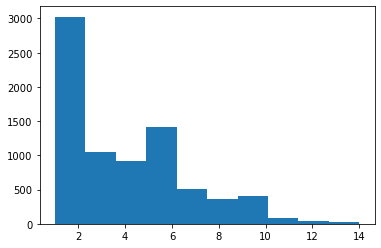

In [8]:
plt.hist(data['drop_sequence'])

<AxesSubplot:>

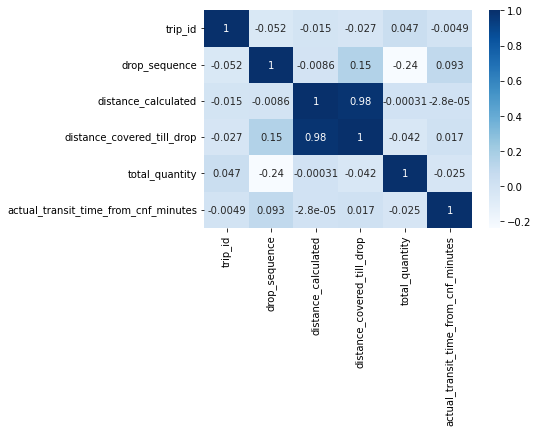

In [9]:
sns.heatmap(data.corr(),annot = True, cmap = 'Blues')

In [10]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7912    False
7913    False
7914    False
7915    False
7916    False
Length: 7833, dtype: bool

In [11]:
data.head()

,trip_id,drop_sequence,distance_calculated,distance_covered_till_drop,origin_warehouse_code,destination_warehouse_code,total_quantity,actual_transit_time_from_cnf_minutes,trip_created_date,trip_start_time,geofence_in_time,geofence_out_time
0,23297.0,1.0,11.0,11.0,C220,25001891,2.0,12.875800,2023-02-01,2023-02-01T10:50:06.452,2023-02-01T11:02:59,2023-02-01T11:15:23
1,23297.0,2.0,16.0,27.0,C220,10015094,30.0,92.809133,2023-02-01,2023-02-01T10:50:06.452,2023-02-01T12:22:55,2023-02-01T12:36:09.980
2,23298.0,1.0,14.0,14.0,C220,10003303,65.0,41.280700,2023-02-01,2023-02-01T10:52:08.158,2023-02-01T11:33:25,2023-02-01T11:56:15.964
3,23372.0,1.0,14.0,14.0,C220,10003303,100.0,17.953983,2023-02-01,2023-02-01T11:26:10.013,2023-02-01T11:44:07.252,2023-02-01T12:06:06.993
4,23595.0,1.0,18.0,18.0,C220,10013469,24.0,63.004467,2023-02-01,2023-02-01T13:18:07.732,2023-02-01T14:21:08,2023-02-01T14:35:58


### Feature Engineering

In [12]:
time = pd.to_datetime(data['trip_start_time'])
data['trip_start_hour']= time.dt.hour
data['trip_start_minutes']= time.dt.minute

In [13]:
time1 = pd.to_datetime(data['geofence_in_time'])
data['geofence_in_time_hour']= time1.dt.hour
data['geofence_in_time_minute']= time1.dt.minute

In [14]:
data.head()

,trip_id,drop_sequence,distance_calculated,distance_covered_till_drop,origin_warehouse_code,destination_warehouse_code,total_quantity,actual_transit_time_from_cnf_minutes,trip_created_date,trip_start_time,geofence_in_time,geofence_out_time,trip_start_hour,trip_start_minutes,geofence_in_time_hour,geofence_in_time_minute
0,23297.0,1.0,11.0,11.0,C220,25001891,2.0,12.875800,2023-02-01,2023-02-01T10:50:06.452,2023-02-01T11:02:59,2023-02-01T11:15:23,10,50,11,2
1,23297.0,2.0,16.0,27.0,C220,10015094,30.0,92.809133,2023-02-01,2023-02-01T10:50:06.452,2023-02-01T12:22:55,2023-02-01T12:36:09.980,10,50,12,22
2,23298.0,1.0,14.0,14.0,C220,10003303,65.0,41.280700,2023-02-01,2023-02-01T10:52:08.158,2023-02-01T11:33:25,2023-02-01T11:56:15.964,10,52,11,33
3,23372.0,1.0,14.0,14.0,C220,10003303,100.0,17.953983,2023-02-01,2023-02-01T11:26:10.013,2023-02-01T11:44:07.252,2023-02-01T12:06:06.993,11,26,11,44
4,23595.0,1.0,18.0,18.0,C220,10013469,24.0,63.004467,2023-02-01,2023-02-01T13:18:07.732,2023-02-01T14:21:08,2023-02-01T14:35:58,13,18,14,21


In [15]:
matrix = data.corr()
matrix['actual_transit_time_from_cnf_minutes'].abs().sort_values(ascending=False)

actual_transit_time_from_cnf_minutes    1.000000
drop_sequence                           0.092645
total_quantity                          0.024828
trip_start_minutes                      0.018911
distance_covered_till_drop              0.017179
geofence_in_time_minute                 0.006273
trip_id                                 0.004941
geofence_in_time_hour                   0.002122
trip_start_hour                         0.001905
distance_calculated                     0.000028
Name: actual_transit_time_from_cnf_minutes, dtype: float64

### Model Building

In [16]:
X = data[['drop_sequence','distance_covered_till_drop','total_quantity','trip_start_hour','trip_start_minutes','geofence_in_time_hour','geofence_in_time_minute']]
Y = data[['actual_transit_time_from_cnf_minutes']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [19]:
model = RandomForestRegressor(n_estimators=300)
model.fit(X_train, y_train)

C:\Users\hp\AppData\Local\Temp\ipykernel_22112\3280119764.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300)

In [21]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [22]:
best_rf_model = grid_search.best_estimator_
best_y_pred = best_rf_model.predict(X_test)
pred = model.predict(X_test)
best_rf_model

RandomForestRegressor(max_depth=30, min_samples_split=5, random_state=42)

### Accuracy

In [23]:
best_mae = mean_absolute_error(y_test, best_y_pred)
best_r2 = r2_score(y_test, best_y_pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

In [24]:
print(f"Mean Absolute Error (MSE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Tuned Mean Absolute Error (MSE): {best_mae}")
print(f"Tuned R-squared (R2): {best_r2}")

Mean Absolute Error (MSE): 14.875592326194447
R-squared (R2): 0.6634464981260877
Tuned Mean Absolute Error (MSE): 15.347730678650336
Tuned R-squared (R2): 0.6556644436773815


In [25]:
y_test = y_test.reset_index(drop=True)
y_test['pred'] = pred
y_test['error'] = abs(y_test['actual_transit_time_from_cnf_minutes'] - y_test['pred'])
y_test.loc[y_test['error'] < 30, 'error'] = 0
y_test['sq_error'] = y_test['error']**2

In [26]:
mae = sum(y_test['error'])/len(y_test['error'])
sse = sum(y_test['sq_error'])

In [27]:
mean_actual = np.mean(y_test['actual_transit_time_from_cnf_minutes'])
squared_deviations = (y_test['actual_transit_time_from_cnf_minutes'] - mean_actual) ** 2
sst = np.sum(squared_deviations)

In [28]:
r_squared = 1 - (sse / sst)
print(f"R-squared:{r_squared}")
print(f"Mean Absolute Error (MSE): {mae}")

R-squared:0.6864325995455387
Mean Absolute Error (MSE): 6.958870081551797
